# Step 4: Random assorted EDA visualizations for final presentation.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import dates as mpl_dates
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import tree

In [39]:
df = pd.read_csv('data/cleaned_data', parse_dates = ['date'], 
                   index_col = 'date', dtype = {'subject_age': 'category', 'officer_gender':'category', 
                    'officer_race': 'category', 'subject_race':'category', 
                    'subject_gender':'category','arrest':'category', 
                    'frisk':'category'})
df.sort_index(inplace = True)
df['count'] = 1
df['frisk'] = df['frisk'].replace({0: 'Not Frisked', 1: 'Frisked'})

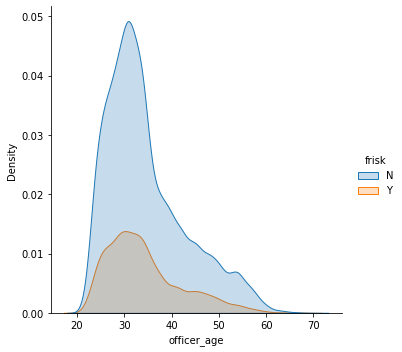

In [26]:
sns.displot(data=df, x='officer_age', hue='frisk', kind='kde', fill=True);

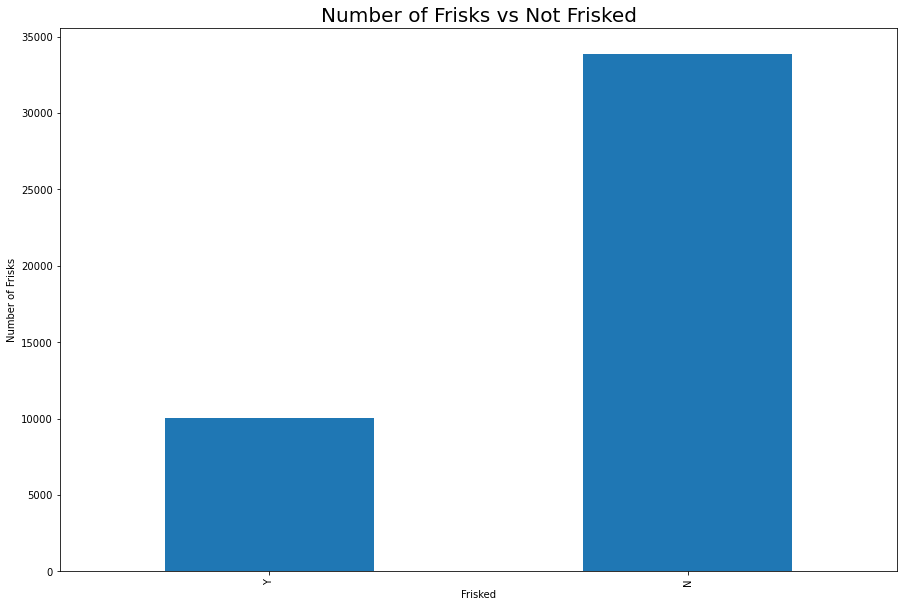

In [35]:
#plot target variablesy = “target”
fig, ax=plt.subplots(figsize=(15,10))
y = df["frisk"]
ax = df["frisk"].value_counts().sort_values().plot(kind='bar')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
plt.ylabel('Number of Frisks')
plt.xlabel('Frisked')
plt.title('Number of Frisks vs Not Frisked', fontsize = 20)
plt.show()

~30 percent of Terry Stops result in a Frisk

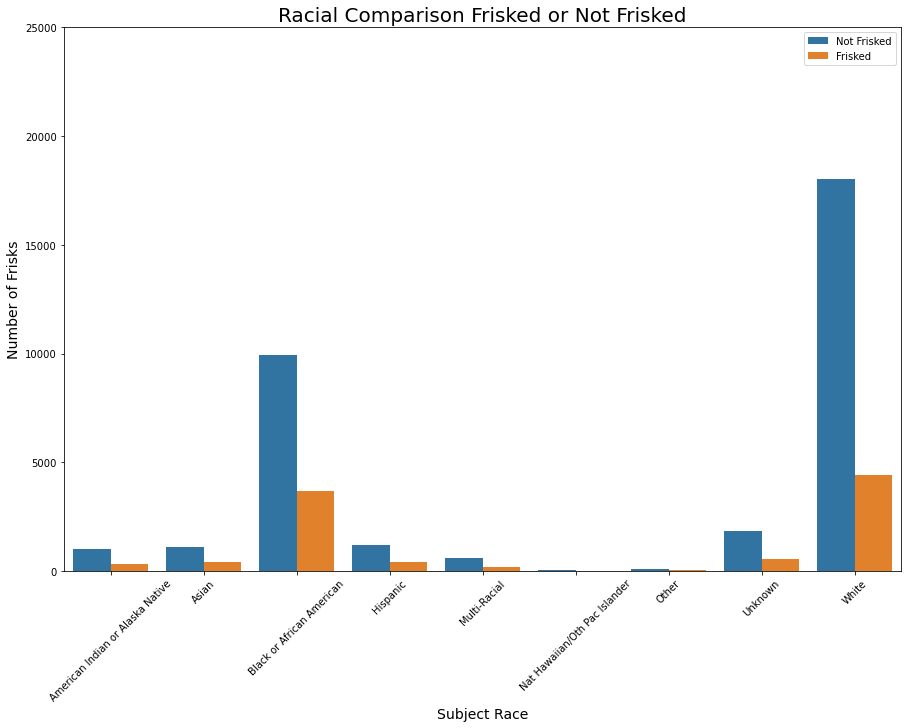

In [42]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(x='subject_race', data=df, hue='frisk')
ax.set_ylim(0,25000)
plt.title('Racial Comparison Frisked or Not Frisked', fontsize = 20)
plt.xlabel('Subject Race', fontsize = 14)
plt.ylabel('Number of Frisks', fontsize = 14)
plt.legend(loc = 'best', labels = ['Not Frisked', 'Frisked'] )
plt.xticks(rotation = 45)
plt.show()

Racially, White subjects are just as likely to get frisked as Black subjects but they are more likely to not get frisked. Racially disporportionate. 